<font size="+12"><center>
    Data Science Packages Processing
</font></center>
This first notebook pre-process all README from a list of Data Science packages and output cleaned dataset that can be input to other tasks (e.g Clustering, Classification)

## Import libraries

In [40]:
import os
import json
import csv
import subprocess
import enchant

import pandas as pd
import spacy
import matplotlib.pyplot as plt

from datetime import datetime
from pathlib import Path

from tqdm import tqdm

In [3]:
The installation doesn’t automatically download the English model.
try:
    subprocess.run(
        f"pipenv run python3 -m spacy download en",
        shell=True,
    )

except Exception as e :
    print(f"Could not enter environment {e}")

try:
    _NLP_SPACY = spacy.load("en")
except Exception as load_model:
    print(load_model)

In [2]:
# Introduce the US vocabulary
US_VOCABULARY = enchant.Dict("en_US")

## 1. Retrieve raw data

In [53]:
current_path = Path.cwd().parents[0]
raw_data_path = current_path.joinpath("data/raw")
raw_data_file_path = raw_data_path.joinpath("hundreds_data_science_packages_initial_dataset.json")

with open(raw_data_file_path, "r") as retrieved_file:
    raw_files = json.load(retrieved_file)

n_max = 1000
test_subset = {}
n_count = 0
for package_name, raw_test in raw_files.items():
    if n_count == n_max - 1:
        break

    test_subset[package_name] = raw_test
    n_count += 1

raw_files = test_subset
data_science_readmes_pd = pd.DataFrame(raw_files).transpose()
data_science_readmes_pd
data_science_readmes_pd.rename(columns={"file_name": "project_org_readme", "raw_text": "raw_text"})

,project_org_readme,raw_text
alibi,SeldonIO/alibi/README.md,"<p align=""center"">\n <img src=""doc/source/_st..."
altair,altair-viz/altair/README.md,"# Altair <a href=""https://altair-viz.github.io..."
ax-platform,facebook/Ax/README.md,"<img width=""300"" src=""website/static/img/ax_lo..."
arviz,arviz-devs/arviz/README.md,"<img src=""https://arviz-devs.github.io/arviz/_..."
autogluon,awslabs/autogluon/README.md,"\n\n<div align=""left"">\n <img src=""https://us..."
...,...,...
vincent,wrobstory/vincent/README.md,# Status\n\n#### 2016-06-18 Update\n\nIf you a...
voila,voila-dashboards/voila/README.md,# ![voila](docs/source/voila-logo.svg)\n\n[![D...
word2vec,danielfrg/word2vec/README.md,word2vec\n========\n\n[![travis-ci](https://ap...
xgboost,dmlc/xgboost/README.md,<img src=https://raw.githubusercontent.com/dml...


## 2. Natural Language Processing (NLP)

### 2.1 Add inputs for processing

In [13]:
external_data_path = current_path.joinpath("data/external")
# Retrieve list of common words for normalization
with open(f"{external_data_path}/common_words.txt", "r") as retrieved_file:
    common_words_txt = retrieved_file.read()

common_words = [word for word in common_words_txt.split("\n")]
print(f"Common words... \n{common_words}")

Common words... 
['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'b', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'c', 'can', "can't", 'cannot', 'cc', 'come', 'could', "couldn't", 'did', "didn't", 'different', 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'easy', 'en', 'etc', 'few', 'for', 'from', 'full', 'further', 'get', 'go', 'good', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'inc', 'instead', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'many', 'me', 'more', 'most', "mustn't", 'my', 'myself', 'need', 'new', 'no', 'non', 'nor', 'not', 'obviously', 'of', 'off', 'old', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'o

In [14]:
# Retrieve list of common words for normalization
with open(f"{external_data_path}/specific_common_words.txt", "r") as retrieved_file:
    specific_common_words_txt = retrieved_file.read()

specific_common_words = [word for word in specific_common_words_txt.split("\n")]
print(f"Specific Common words... \n{specific_common_words}")

Specific Common words... 
['abbr', 'additional', 'alt', 'amazon', 'application', 'available', 'binary', 'bug', 'citation', 'chat', 'check', 'cite', 'class', 'code', 'command', 'community', 'consider', 'contribute', 'contribution', 'datum', 'dependency', 'directory', 'detail', 'developer', 'development', 'distribution', 'doc', 'docs', 'document', 'documentation', 'environment', 'example', 'file', 'first', 'google', 'git', 'ids', 'implementation', 'import', 'include', 'instance', 'instances', 'installation', 'interface', 'issue', 'items', 'last', 'late', 'learn', 'library', 'license', 'like', 'ls', 'main', 'may', 'module', 'names', 'model', 'node', 'object', 'one', 'page', 'path', 'pip', 'package', 'parameter', 'please', 'project', 'python', 'release', 'repository', 'request', 'requirement', 'result', 'see', 'self', 'server', 'service', 'sh', 'software', 'source', 'status', 'system', 'target', 'type', 'tool', 'tutorial', 'usage', 'user', 'value', 'version', 'via', 'way', 'website', 'well

In [15]:
# Retrieve list of non-character word for normalization
with open(f"{external_data_path}/non_character_words.txt", "r") as retrieved_file:
    non_characerter_words_txt = retrieved_file.read()

non_characerter_words = [word for word in non_characerter_words_txt.split("\n")]
print(f"Non character words... \n{non_characerter_words}")

Non character words... 
['!', '?', ',', ':', "'", '’', '“', '”', '.', '=', '[', ']', '#', ';', '...', '"', '{', '}', '``', '-', '/', '|', '@', "''", '©', '&', '∈', '²', '']


In [69]:
sentences = {}
tokens = {}

extracted_adverbs = []
extracted_verbs = []
extracted_adjectives = []

for package_name, package_data in tqdm(raw_files.items(), desc="Cleaning raw text documents"):
    print(package_name)
    doc = _NLP_SPACY(package_data['raw_text'])
    sentences[package_name] = []
    tokens[package_name] = []
    n = 1
    for sent in doc.sents:
        doc_sent = _NLP_SPACY(str(sent))
        sentences[package_name].append(doc_sent)
        
        clean_tokens = [(token.text, token.pos_, token.lemma_, token.is_stop) for token in doc_sent]
        

        ALLOWED_POS = ["VERB", "AUX"]
        pos = [p[1] for p in clean_tokens]

        if not any(v in pos for v in ALLOWED_POS):
            pass
        else:
            # Remove common words
            clean_tokens = [token for token in clean_tokens if str(token[0]).lower() not in common_words]
        
        
        # Use POS, The simple part-of-speech tag.
        # Adverbs
        candidate_adverbs = [token[2] for token in clean_tokens if token[1] in ["ADV"]]

        # Verbs
        candidate_verbs = [token[2] for token in clean_tokens if token[1] in ["VERB"]]

        # Adjectives
        candidate_adjectives = [token[2] for token in clean_tokens if token[1] in ["ADJ"]]

        # Use lemmatization and remove stop words
        clean_tokens = [str(token[2]) for token in clean_tokens if not token[3]]
        clean_tokens = [
            token.strip("'").rstrip("-").lstrip("-").lstrip(".").lstrip("∗").lstrip("–").rstrip(".")
            for token in clean_tokens
        ]

        # Remove common words
        clean_tokens = [token for token in clean_tokens if token not in common_words]

        # Remove stopwords, punctuations, symbols
        clean_tokens = [
            token for token in clean_tokens if len(token) >= 1 and token.lower() not in non_characerter_words
        ]

        # Lower the tokens and filter specific common words
        clean_tokens = [token.lower() for token in clean_tokens if token.lower() not in specific_common_words]

        # Check vocabulary using US vocabulary
        clean_tokens = [token for token in clean_tokens if (US_VOCABULARY.check(token)) and (len(token) > 1)]

        # Remove numbers, keep only alphabetic words and remove empty spaces
        clean_tokens = [token for token in clean_tokens if not token[0].isdigit()]
        clean_tokens = [token for token in clean_tokens if token.isalpha()]
        clean_tokens = [token for token in clean_tokens if " " not in token]

        # Remove adverbs
        if candidate_adverbs:
            for adverb in candidate_adverbs:
                if adverb not in extracted_adverbs and adverb in clean_tokens:
                    extracted_adverbs.append(adverb)
            clean_tokens = [token for token in clean_tokens if token not in candidate_adverbs]

        # Remove verbs
        if candidate_verbs:
            for verb in candidate_verbs:
                if verb not in extracted_verbs and verb in clean_tokens:
                    extracted_verbs.append(verb)
            clean_tokens = [token for token in clean_tokens if token not in candidate_verbs]

        # Remove adjectives
        if candidate_adjectives:
            for adjective in candidate_adjectives:
                if adjective not in extracted_adjectives and adjective in clean_tokens:
                    extracted_adjectives.append(adjective)
            # clean_tokens = [token for token in clean_tokens if token not in candidate_adjectives]

        tokens[package_name] += clean_tokens
        
        
data_science_readmes_pd['sentences'] = sentences.values()
data_science_readmes_pd['tokens'] = tokens.values()

Cleaning raw text documents:   0%|          | 0/119 [00:00<?, ?it/s]

alibi


Cleaning raw text documents:   1%|          | 1/119 [00:01<03:43,  1.89s/it]

altair


Cleaning raw text documents:   2%|▏         | 2/119 [00:03<03:54,  2.00s/it]

ax-platform


Cleaning raw text documents:   3%|▎         | 3/119 [00:05<03:20,  1.73s/it]

arviz


Cleaning raw text documents:   3%|▎         | 4/119 [00:07<03:14,  1.69s/it]

autogluon


Cleaning raw text documents:   4%|▍         | 5/119 [00:07<02:34,  1.36s/it]

autokeras


Cleaning raw text documents:   5%|▌         | 6/119 [00:08<02:21,  1.25s/it]

avro
beautifulsoup4


Cleaning raw text documents:   7%|▋         | 8/119 [00:10<01:43,  1.07it/s]

bentoml


Cleaning raw text documents:   8%|▊         | 9/119 [00:13<02:41,  1.47s/it]

bokeh


Cleaning raw text documents:   8%|▊         | 10/119 [00:17<04:04,  2.24s/it]

boto3


Cleaning raw text documents:   9%|▉         | 11/119 [00:18<03:26,  1.91s/it]

catboost


Cleaning raw text documents:  10%|█         | 12/119 [00:19<02:58,  1.66s/it]

causalml


Cleaning raw text documents:  11%|█         | 13/119 [00:21<03:20,  1.89s/it]

cloudpickle


Cleaning raw text documents:  12%|█▏        | 14/119 [00:23<02:58,  1.70s/it]

ConfigSpace


Cleaning raw text documents:  13%|█▎        | 15/119 [00:23<02:11,  1.27s/it]

cortex


Cleaning raw text documents:  13%|█▎        | 16/119 [00:25<02:26,  1.42s/it]

cudf


Cleaning raw text documents:  14%|█▍        | 17/119 [00:26<02:14,  1.32s/it]

cuml


Cleaning raw text documents:  15%|█▌        | 18/119 [00:27<02:21,  1.40s/it]

cupy


Cleaning raw text documents:  16%|█▌        | 19/119 [00:28<02:07,  1.27s/it]

Cython


Cleaning raw text documents:  17%|█▋        | 20/119 [00:29<01:49,  1.11s/it]

dagster


Cleaning raw text documents:  18%|█▊        | 21/119 [00:32<02:55,  1.79s/it]

dalex


Cleaning raw text documents:  18%|█▊        | 22/119 [00:34<02:47,  1.72s/it]

dask


Cleaning raw text documents:  19%|█▉        | 23/119 [00:34<02:05,  1.31s/it]

dgl


Cleaning raw text documents:  20%|██        | 24/119 [00:38<03:12,  2.03s/it]

dill


Cleaning raw text documents:  21%|██        | 25/119 [00:39<02:40,  1.71s/it]

distributed


Cleaning raw text documents:  22%|██▏       | 26/119 [00:39<01:59,  1.29s/it]

dowhy


Cleaning raw text documents:  23%|██▎       | 27/119 [00:43<02:58,  1.95s/it]

dtale


Cleaning raw text documents:  24%|██▎       | 28/119 [00:54<06:57,  4.59s/it]

dvc


Cleaning raw text documents:  24%|██▍       | 29/119 [00:57<06:17,  4.20s/it]

eli5


Cleaning raw text documents:  25%|██▌       | 30/119 [00:58<04:42,  3.17s/it]

fastai


Cleaning raw text documents:  26%|██▌       | 31/119 [01:00<04:16,  2.92s/it]

fiber


Cleaning raw text documents:  27%|██▋       | 32/119 [01:01<03:36,  2.49s/it]

fiscalyear


Cleaning raw text documents:  28%|██▊       | 33/119 [01:03<03:01,  2.11s/it]

fbprophet


Cleaning raw text documents:  29%|██▊       | 34/119 [01:04<02:36,  1.84s/it]

Flask


Cleaning raw text documents:  29%|██▉       | 35/119 [01:04<02:02,  1.46s/it]

gensim


Cleaning raw text documents:  30%|███       | 36/119 [01:07<02:18,  1.66s/it]

graphviz


Cleaning raw text documents:  31%|███       | 37/119 [01:08<02:13,  1.63s/it]

gspread-pandas


Cleaning raw text documents:  32%|███▏      | 38/119 [01:10<02:26,  1.81s/it]

h5py


Cleaning raw text documents:  33%|███▎      | 39/119 [01:11<01:51,  1.40s/it]

horovod


Cleaning raw text documents:  34%|███▎      | 40/119 [01:15<02:51,  2.17s/it]

hpbandster


Cleaning raw text documents:  34%|███▍      | 41/119 [01:15<02:04,  1.60s/it]

interpret


Cleaning raw text documents:  35%|███▌      | 42/119 [01:21<03:54,  3.04s/it]

jellyfish


Cleaning raw text documents:  36%|███▌      | 43/119 [01:22<02:58,  2.35s/it]

jax


Cleaning raw text documents:  37%|███▋      | 44/119 [01:26<03:37,  2.91s/it]

jupyter


Cleaning raw text documents:  38%|███▊      | 45/119 [01:27<02:44,  2.22s/it]

jupyter-datatables


Cleaning raw text documents:  39%|███▊      | 46/119 [01:28<02:18,  1.89s/it]

jupyter-nbrequirements


Cleaning raw text documents:  39%|███▉      | 47/119 [01:29<01:58,  1.64s/it]

jupyterlab


Cleaning raw text documents:  40%|████      | 48/119 [01:31<01:55,  1.63s/it]

jupyterlab-templates


Cleaning raw text documents:  41%|████      | 49/119 [01:31<01:29,  1.29s/it]

karateclub


Cleaning raw text documents:  42%|████▏     | 50/119 [01:35<02:25,  2.11s/it]

Keras


Cleaning raw text documents:  43%|████▎     | 51/119 [01:37<02:22,  2.09s/it]

librosa


Cleaning raw text documents:  44%|████▎     | 52/119 [01:38<01:57,  1.75s/it]

lightgbm


Cleaning raw text documents:  45%|████▍     | 53/119 [01:40<01:54,  1.73s/it]

lime


Cleaning raw text documents:  45%|████▌     | 54/119 [01:41<01:37,  1.50s/it]

ludwig


Cleaning raw text documents:  46%|████▌     | 55/119 [01:43<01:44,  1.63s/it]

Markdown


Cleaning raw text documents:  47%|████▋     | 56/119 [01:43<01:20,  1.28s/it]

matplotlib


Cleaning raw text documents:  48%|████▊     | 57/119 [01:44<01:14,  1.21s/it]

markovify


Cleaning raw text documents:  49%|████▊     | 58/119 [01:49<02:07,  2.09s/it]

mlflow


Cleaning raw text documents:  50%|████▉     | 59/119 [01:50<01:48,  1.81s/it]

mxnet


Cleaning raw text documents:  50%|█████     | 60/119 [01:52<02:02,  2.07s/it]

netron


Cleaning raw text documents:  51%|█████▏    | 61/119 [01:54<01:51,  1.92s/it]

networkx


Cleaning raw text documents:  52%|█████▏    | 62/119 [01:55<01:28,  1.56s/it]

nltk


Cleaning raw text documents:  53%|█████▎    | 63/119 [01:55<01:07,  1.21s/it]

nni


Cleaning raw text documents:  54%|█████▍    | 64/119 [02:01<02:29,  2.72s/it]

notify-run


Cleaning raw text documents:  55%|█████▍    | 65/119 [02:02<01:47,  1.98s/it]

numba


Cleaning raw text documents:  55%|█████▌    | 66/119 [02:02<01:21,  1.55s/it]

numexpr


Cleaning raw text documents:  56%|█████▋    | 67/119 [02:03<01:15,  1.46s/it]

numpy


Cleaning raw text documents:  57%|█████▋    | 68/119 [02:04<01:01,  1.20s/it]

onnx


Cleaning raw text documents:  58%|█████▊    | 69/119 [02:06<01:06,  1.32s/it]

opencv-python


Cleaning raw text documents:  59%|█████▉    | 70/119 [02:08<01:15,  1.55s/it]

paddlepaddle


Cleaning raw text documents:  60%|█████▉    | 71/119 [02:09<01:08,  1.44s/it]

pandas


Cleaning raw text documents:  61%|██████    | 72/119 [02:10<01:11,  1.52s/it]

pandas-profiling


Cleaning raw text documents:  61%|██████▏   | 73/119 [02:14<01:35,  2.07s/it]

papermill


Cleaning raw text documents:  62%|██████▏   | 74/119 [02:16<01:32,  2.05s/it]

patsy


Cleaning raw text documents:  63%|██████▎   | 75/119 [02:16<01:07,  1.53s/it]

petastorm


Cleaning raw text documents:  64%|██████▍   | 76/119 [02:20<01:29,  2.08s/it]

pillow


Cleaning raw text documents:  65%|██████▍   | 77/119 [02:21<01:14,  1.78s/it]

plotly


Cleaning raw text documents:  66%|██████▌   | 78/119 [02:22<01:14,  1.81s/it]

pomegranate


Cleaning raw text documents:  66%|██████▋   | 79/119 [02:23<01:02,  1.56s/it]

protobuf


Cleaning raw text documents:  67%|██████▋   | 80/119 [02:25<01:05,  1.68s/it]

publish


Cleaning raw text documents:  68%|██████▊   | 81/119 [02:26<00:51,  1.35s/it]

pyarrow


Cleaning raw text documents:  69%|██████▉   | 82/119 [02:27<00:44,  1.20s/it]

pydot


Cleaning raw text documents:  70%|██████▉   | 83/119 [02:27<00:34,  1.05it/s]

pyforest


Cleaning raw text documents:  71%|███████   | 84/119 [02:29<00:39,  1.13s/it]

pymc3


Cleaning raw text documents:  71%|███████▏  | 85/119 [02:31<00:45,  1.35s/it]

pyro


Cleaning raw text documents:  72%|███████▏  | 86/119 [02:32<00:42,  1.28s/it]

pyspark


Cleaning raw text documents:  73%|███████▎  | 87/119 [02:33<00:37,  1.16s/it]

qgrid


Cleaning raw text documents:  74%|███████▍  | 88/119 [02:36<00:56,  1.84s/it]

rapidfuzz


Cleaning raw text documents:  75%|███████▍  | 89/119 [02:37<00:49,  1.64s/it]

ray


Cleaning raw text documents:  76%|███████▌  | 90/119 [02:39<00:51,  1.77s/it]

requests


Cleaning raw text documents:  77%|███████▋  | 92/119 [02:41<00:34,  1.27s/it]

s3fs
scikit-learn


Cleaning raw text documents:  78%|███████▊  | 93/119 [02:42<00:33,  1.29s/it]

scipy


Cleaning raw text documents:  79%|███████▉  | 94/119 [02:43<00:26,  1.08s/it]

scrapy


Cleaning raw text documents:  80%|███████▉  | 95/119 [02:44<00:21,  1.10it/s]

seaborn


Cleaning raw text documents:  81%|████████  | 96/119 [02:45<00:21,  1.08it/s]

shap


Cleaning raw text documents:  82%|████████▏ | 97/119 [02:49<00:42,  1.93s/it]

skorch


Cleaning raw text documents:  82%|████████▏ | 98/119 [02:51<00:40,  1.94s/it]

spacy


Cleaning raw text documents:  83%|████████▎ | 99/119 [02:54<00:48,  2.42s/it]

sqlalchemy


Cleaning raw text documents:  84%|████████▍ | 100/119 [02:55<00:37,  1.99s/it]

statsmodels


Cleaning raw text documents:  85%|████████▍ | 101/119 [02:56<00:30,  1.71s/it]

streamz


Cleaning raw text documents:  86%|████████▌ | 102/119 [02:57<00:21,  1.28s/it]

sympy


Cleaning raw text documents:  87%|████████▋ | 103/119 [02:59<00:25,  1.58s/it]

tensorflow


Cleaning raw text documents:  87%|████████▋ | 104/119 [03:02<00:29,  1.97s/it]

textblob


Cleaning raw text documents:  88%|████████▊ | 105/119 [03:03<00:22,  1.61s/it]

tokenizers


Cleaning raw text documents:  89%|████████▉ | 106/119 [03:04<00:18,  1.46s/it]

transformers


Cleaning raw text documents:  90%|████████▉ | 107/119 [03:13<00:45,  3.76s/it]

Theano


Cleaning raw text documents:  91%|█████████ | 108/119 [03:13<00:30,  2.76s/it]

tdda


Cleaning raw text documents:  92%|█████████▏| 109/119 [03:14<00:21,  2.17s/it]

torch


Cleaning raw text documents:  92%|█████████▏| 110/119 [03:18<00:24,  2.70s/it]

torch-geometric


Cleaning raw text documents:  93%|█████████▎| 111/119 [03:24<00:29,  3.73s/it]

torchelastic


Cleaning raw text documents:  94%|█████████▍| 112/119 [03:25<00:19,  2.80s/it]

torchserve


Cleaning raw text documents:  95%|█████████▍| 113/119 [03:27<00:16,  2.67s/it]

vega


Cleaning raw text documents:  96%|█████████▌| 114/119 [03:28<00:10,  2.06s/it]

vincent


Cleaning raw text documents:  97%|█████████▋| 115/119 [03:30<00:09,  2.26s/it]

voila


Cleaning raw text documents:  97%|█████████▋| 116/119 [03:31<00:05,  1.85s/it]

word2vec


Cleaning raw text documents:  98%|█████████▊| 117/119 [03:32<00:02,  1.39s/it]

xgboost


Cleaning raw text documents:  99%|█████████▉| 118/119 [03:33<00:01,  1.38s/it]

xlrd


Cleaning raw text documents: 100%|██████████| 119/119 [03:34<00:00,  1.80s/it]
/opt/app-root/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [70]:
data_science_readmes_pd

,file_name,raw_text,sentences,tokens,vocabulary,vocabulary_count
alibi,SeldonIO/alibi/README.md,"<p align=""center"">\n <img src=""doc/source/_st...","[(<, p, align=""center, "", >, \n , <, img, src...","[logo, alibi, alibi, alibi, branch, master, al...","[fashion, iris, pandas, trust, title, give, ne...",123
altair,altair-viz/altair/README.md,"# Altair <a href=""https://altair-viz.github.io...","[(#, Altair, <, a, href=""https://altair, -, vi...","[logo, viz, viz, viz, build, viz, style, badge...","[notebooks, pandas, deliberate, northern, asse...",245
ax-platform,facebook/Ax/README.md,"<img width=""300"" src=""website/static/img/ax_lo...","[(<, img, width=""300, "", src=""website, /, stat...","[static, logo, build, ax, ax, build, ax, ax, b...","[reinforcement, adaptive, ability, decision, m...",165
arviz,arviz-devs/arviz/README.md,"<img src=""https://arviz-devs.github.io/arviz/_...","[(<, img, src=""https://arviz, -, devs.github.i...","[azure, build, build, master, branch, master, ...","[unified, open, official, helpful, positive, t...",53
autogluon,awslabs/autogluon/README.md,"\n\n<div align=""left"">\n <img src=""https://us...","[(\n\n, <, div, align=""left, ""), (>, \n , <, ...","[div, toolkit, deep, learning, view, job, job,...","[entry, accept, installing, open, text, machin...",68
...,...,...,...,...,...,...
vincent,wrobstory/vincent/README.md,# Status\n\n#### 2016-06-18 Update\n\nIf you a...,"[(#, Status, \n\n, #, #, #, #, 2016, -, 06, -,...","[update, interested, great, team, team, update...","[field, pandas, bind, county, getting, develop...",133
voila,voila-dashboards/voila/README.md,# ![voila](docs/source/voila-logo.svg)\n\n[![D...,"[(#, !), ([, voila](docs, /, source, /, voila,...","[voila, voila, dashboard, voila, badge, live, ...","[notebooks, usual, preview, prevent, option, m...",103
word2vec,danielfrg/word2vec/README.md,word2vec\n========\n\n[![travis-ci](https://ap...,"[(word2vec, \n), (=, =, =, =, =, =, =, =, \n\n...","[training, original, functionality, pure, inst...","[master, functionality, word, training, look, ...",28
xgboost,dmlc/xgboost/README.md,<img src=https://raw.githubusercontent.com/dml...,"[(<, img, src, =, https://raw.githubuserconten...","[master, logo, extreme, gradient, job, job, ma...","[portable, major, design, fast, open, cash, so...",75


### 2.2 Visualize vocabulary length per document

In [71]:
vocabulary_package = {}
vocabulary_count = {}

for package_name, tokens_list in tokens.items():
    vocabulary = list(set(tokens_list))
    vocabulary_package[package_name] = vocabulary
    vocabulary_count[package_name] = len(vocabulary)

data_science_readmes_pd['vocabulary'] = vocabulary_package.values()
data_science_readmes_pd['vocabulary_count'] = vocabulary_count.values()

/opt/app-root/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [72]:
data_science_readmes_pd

,file_name,raw_text,sentences,tokens,vocabulary,vocabulary_count
alibi,SeldonIO/alibi/README.md,"<p align=""center"">\n <img src=""doc/source/_st...","[(<, p, align=""center, "", >, \n , <, img, src...","[logo, alibi, alibi, alibi, branch, master, al...","[fashion, iris, pandas, trust, title, negative...",95
altair,altair-viz/altair/README.md,"# Altair <a href=""https://altair-viz.github.io...","[(#, Altair, <, a, href=""https://altair, -, vi...","[logo, viz, viz, viz, build, viz, style, badge...","[notebooks, pandas, deliberate, northern, asse...",175
ax-platform,facebook/Ax/README.md,"<img width=""300"" src=""website/static/img/ax_lo...","[(<, img, width=""300, "", src=""website, /, stat...","[static, logo, build, ax, ax, build, ax, ax, b...","[reinforcement, adaptive, ability, decision, m...",118
arviz,arviz-devs/arviz/README.md,"<img src=""https://arviz-devs.github.io/arviz/_...","[(<, img, src=""https://arviz, -, devs.github.i...","[azure, build, build, master, branch, master, ...","[unified, open, official, helpful, positive, t...",44
autogluon,awslabs/autogluon/README.md,"\n\n<div align=""left"">\n <img src=""https://us...","[(\n\n, <, div, align=""left, ""), (>, \n , <, ...","[div, toolkit, deep, learning, view, job, job,...","[entry, installing, open, text, machine, paper...",53
...,...,...,...,...,...,...
vincent,wrobstory/vincent/README.md,# Status\n\n#### 2016-06-18 Update\n\nIf you a...,"[(#, Status, \n\n, #, #, #, #, 2016, -, 06, -,...","[update, interested, great, team, team, update...","[field, pandas, county, getting, element, mill...",100
voila,voila-dashboards/voila/README.md,# ![voila](docs/source/voila-logo.svg)\n\n[![D...,"[(#, !), ([, voila](docs, /, source, /, voila,...","[voila, voila, dashboard, voila, badge, live, ...","[standalone, unlike, usual, dashboard, noteboo...",71
word2vec,danielfrg/word2vec/README.md,word2vec\n========\n\n[![travis-ci](https://ap...,"[(word2vec, \n), (=, =, =, =, =, =, =, =, \n\n...","[training, original, functionality, pure, inst...","[distance, examples, accuracy, line, training,...",19
xgboost,dmlc/xgboost/README.md,<img src=https://raw.githubusercontent.com/dml...,"[(<, img, src, =, https://raw.githubuserconten...","[master, logo, extreme, gradient, job, job, ma...","[portable, major, fast, open, cash, machine, t...",59


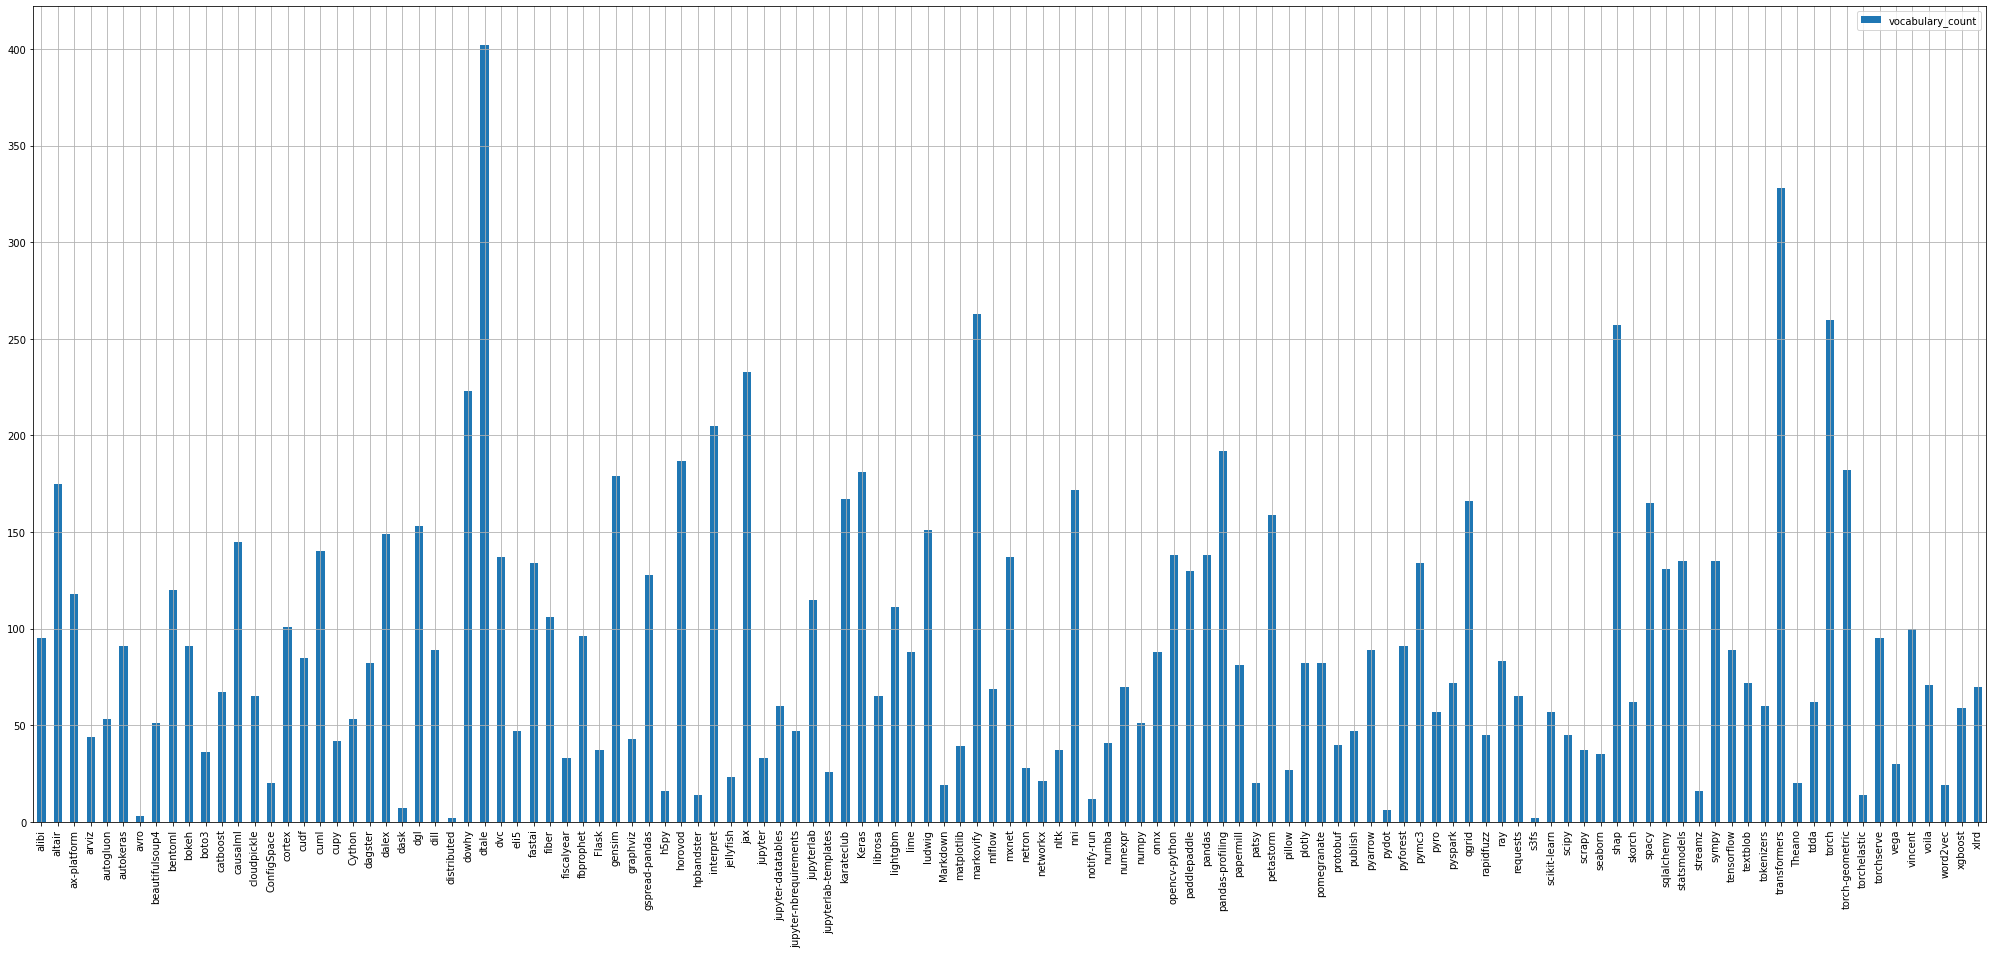

In [73]:
data_science_readmes_pd[['vocabulary_count']].plot.bar(figsize=(35,15), grid=True);

In [74]:
# Count vocabulary

corpus_tokens = []
# Visualize vocabulary and distribution in each package
for _, vocabulary in vocabulary_package.items():
    corpus_tokens += vocabulary

print(f"corpus_tokens length is: {len(corpus_tokens)}")
print(f"corpus_vocabulary length is: {len(set(corpus_tokens))}")

corpus_tokens length is: 10963
corpus_vocabulary length is: 2949


### 2.3 Visualize word count

In [75]:
# Create word count plot data

wordcount = {}

for word in corpus_tokens:
    if word not in wordcount.keys():
        wordcount[word] = 1
    else:
        wordcount[word] += 1

sorted_wc = sorted(wordcount.items(), key=lambda k_v: k_v[1], reverse=True)
file_name = "word_count_bar" + "_" + datetime.utcnow().strftime("%Y-%m-%d_%H:%M:%S")

current_path = Path.cwd().parents[0]
data_path = current_path.joinpath("data")
complete_file_path = data_path.joinpath("processed", file_name)

# with open(f"{complete_file_path}.csv", mode="w") as word_count_bar:
#     word_count = csv.writer(word_count_bar)

#     for word, count in dict(sorted_wc).items():
#         word_count.writerow([word, count])

Word: master, Count: 70
Word: image, Count: 58
Word: install, Count: 56
Word: support, Count: 56
Word: feature, Count: 50
Word: test, Count: 46
Word: information, Count: 45
Word: learning, Count: 44
Word: blob, Count: 44
Word: badge, Count: 43
Word: list, Count: 43
Word: machine, Count: 42
Word: data, Count: 42
Word: high, Count: 41
Word: build, Count: 41
Word: instruction, Count: 39
Word: open, Count: 37
Word: function, Count: 37
Word: use, Count: 35
Word: time, Count: 35
Word: notebook, Count: 34
Word: question, Count: 32
Word: tree, Count: 32
Word: bash, Count: 31
Word: true, Count: 31
Word: guide, Count: 31
Word: large, Count: 31
Word: case, Count: 30
Word: level, Count: 30
Word: set, Count: 30
Word: line, Count: 30
Word: note, Count: 30
Word: current, Count: 29
Word: contributor, Count: 29
Word: reference, Count: 28
Word: web, Count: 28
Word: branch, Count: 27
Word: specific, Count: 27
Word: local, Count: 27
Word: graph, Count: 27
Word: network, Count: 27
Word: research, Count: 26

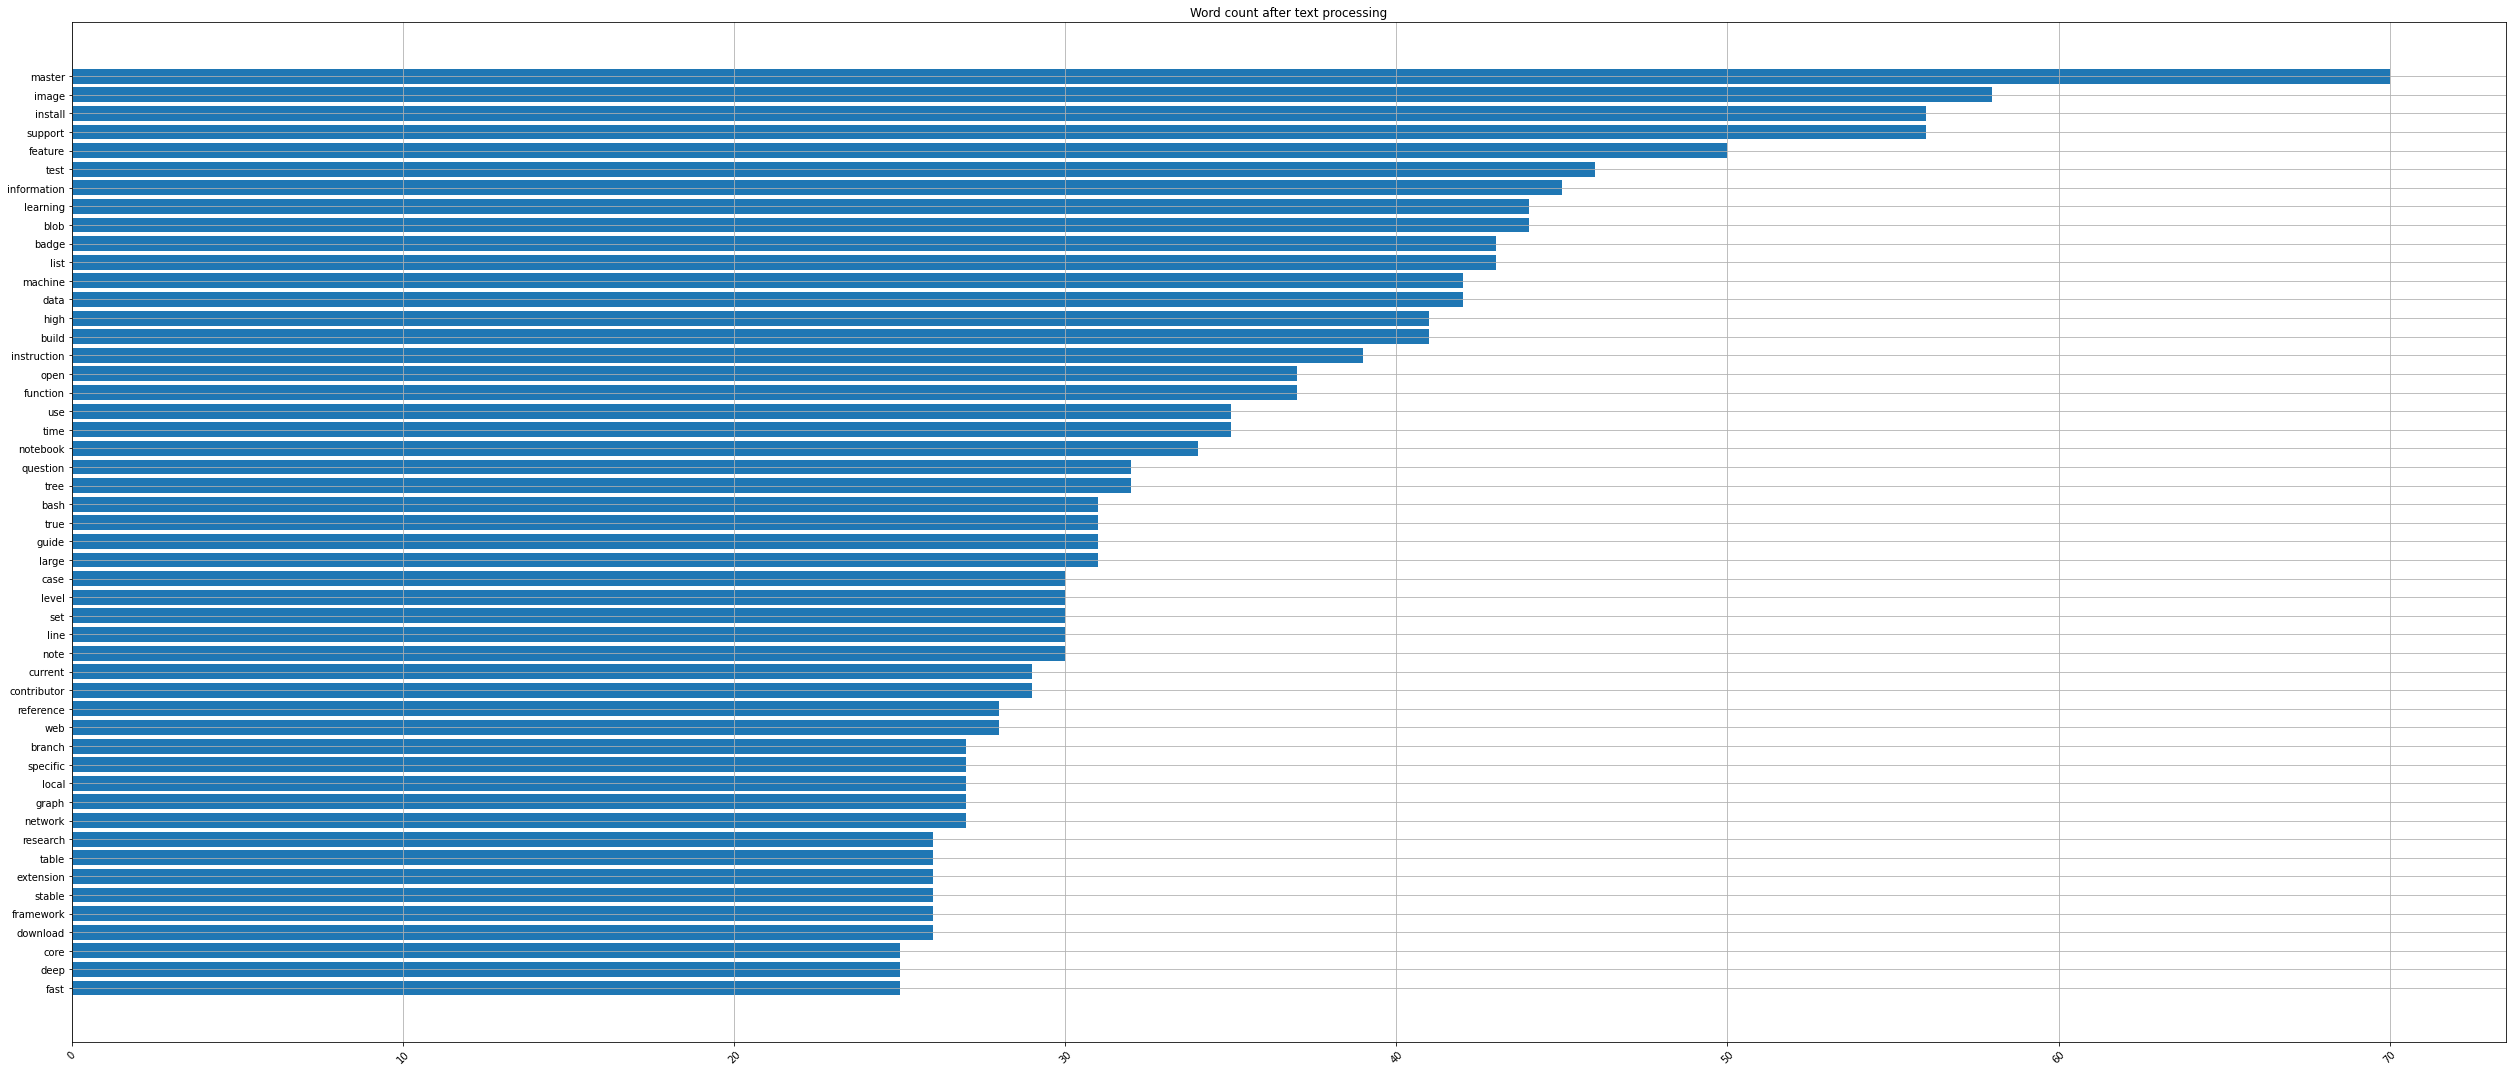

In [76]:
# Visualize word count data
# TODO: show vocabulary statistics
PLOT_NUMBER_TOKENS = int(os.getenv("PLOT_NUMBER_TOKENS", 50))
sorted_wc = sorted(wordcount.items(), key=lambda k_v: k_v[1], reverse=True)
sorted_wc = sorted_wc[:PLOT_NUMBER_TOKENS]

counter = 0
for word, count in sorted_wc:
    if counter <= PLOT_NUMBER_TOKENS:
        print(f"Word: {word}, Count: {count}")

sorted_wc = dict(sorted_wc)
names = list(sorted_wc.keys())
values = list(sorted_wc.values())

plt.figure(figsize=(35,15))
plt.barh(range(len(sorted_wc)), values, tick_label=names)
plt.title("Word count after text processing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.grid()

plot_name = f"top_{PLOT_NUMBER_TOKENS}_word_count_bar" + "_" + datetime.utcnow().strftime("%Y-%m-%d_%H:%M:%S")
plot_repo_path = current_path.joinpath("reports/figures")
# plt.savefig(f"{plot_repo_path}/{plot_name}")

## 3. Store clean dataset

In [80]:
clean_dataset = data_science_readmes_pd['vocabulary'].to_dict()

current_path = Path.cwd().parents[0]
data_path = current_path.joinpath("data/processed")

with open(f"{data_path}/clean_dataset.json", mode="w") as outfile:
    json.dump(clean_dataset, outfile)